## 19.12 - Ostatnie spotkanie Koła w 2017. W dzisiejszym odcinku pakiety Pandas (tabele) oraz Seaborn (wizualizacja danych)

In [279]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
%matplotlib inline

##### Losowe dane

In [356]:
seed = np.random.RandomState(10)
seed2 = np.random.RandomState(11)
age = seed.normal(40,5,25).round(0)
sex = seed.binomial(1,0.5,25)
hap = (seed.beta(20,5,25)*11).round(0)
salary = (seed.gamma(4,50,25)*10).round(-2)
prog = seed.binomial(1,0.5,25)
health = seed2.normal(120,45,25).round(-1)

###### Tabelę (data frame) tworzymy przy pomocy słowników. O nich więcej w 2018, natomiast podstawowa struktura słownika wygląda tak, że używamy klamerek { }, po lewej stronie mamy hasło - cudzysłów obowiązkowy; po prawej definicję - to może być zarówno zmienna, jak i lista, macierz, czy nawet zwykły tekst.

In [360]:
dataDict = {
    'Wiek': age,
    'Zarobki': salary,
    'Płeć': sex,
    'Szczęście': hap,
    'Programowanie': prog,
    'Zdrowie': health
}

## Pandas

###### Funkcja DataFrame służy do stworzenia tabeli, jako argument podajemy zmienną z powyższym słownikiem

In [358]:
myData = pd.DataFrame(data = dataDict)

In [372]:
literki = list(map(chr, range(65, 65+25)))
myData.index = literki

In [373]:
myData

,Programowanie,Płeć,Szczęście,Wiek,Zarobki,Zdrowie
A,0,1,9.0,47.0,3600.0,200.0
B,0,1,8.0,44.0,1800.0,110.0
C,0,1,9.0,32.0,1400.0,100.0
D,0,0,8.0,40.0,1000.0,0.0
E,1,0,8.0,43.0,1500.0,120.0
F,0,0,8.0,36.0,2400.0,110.0
G,0,0,9.0,41.0,2300.0,100.0
H,1,1,10.0,41.0,1600.0,130.0
I,0,0,10.0,40.0,1900.0,140.0
J,0,1,9.0,39.0,2900.0,70.0


##### Wczytujemy plik csv, ta funkcja działa nawet jeśli podamy link w internetach!

In [361]:
titanic = pd.read_csv('https://raw.githubusercontent.com/kpswps/py/master/datasets/titanic_train.csv')

###### Ogólne spojrzenie na dane

In [363]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


###### Pierwszych 5 rzędów - metoda .head()

In [364]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Ostatnich 5 rzędów - metoda .tail()

In [365]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


##### Adresowanie kolumny: nazwa_tabeli['nazwa_kolumny'] - cudzysłów obowiązkowy

In [366]:
titanic['Sex']

0        male
1      female
2      female
3      female
4        male
5        male
6        male
7        male
8      female
9      female
10     female
11     female
12       male
13       male
14     female
15     female
16       male
17       male
18     female
19     female
20       male
21       male
22     female
23       male
24     female
25     female
26       male
27       male
28     female
29       male
        ...  
861      male
862    female
863    female
864      male
865    female
866    female
867      male
868      male
869      male
870      male
871    female
872      male
873      male
874    female
875    female
876      male
877      male
878      male
879    female
880    female
881      male
882    female
883      male
884      male
885    female
886      male
887    female
888    female
889      male
890      male
Name: Sex, dtype: object

##### Alternatywny sposób adresowania kolumn: nazwa_tabeli.nazwa_kolumny - nie używamy cudzysłowu

In [58]:
titanic.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, dtype: float64

##### Indeksowanie pojedynczych wartości w taki sposób jak poniżej nie zadziała - Pandas nasz indeks [0] potraktuje jako nazwę kolumny. Dostajemy błąd, albowiem kolumna o nazwie 0 nie istnieje!

In [369]:
titanic[0]

KeyError: 0

##### Użycie zakresu działa już inaczej - Pandas traktuje to jako adresy rzędów - poniżej bierzemy elementy od 0 do 1 (bez 1, niech żyje Python)...czyli element zerowy.

In [370]:
titanic[0:1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


##### Pierwszych 10 rzędów

In [371]:
titanic[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### W Pandas możemy adresować tabele na różne sposoby, zaczniemy od metody .loc[] (tak, tu są kwadratowe nawiasy), która służy do adresowania po NAZWACH kolumn i rzędów.

In [374]:
myData

,Programowanie,Płeć,Szczęście,Wiek,Zarobki,Zdrowie
A,0,1,9.0,47.0,3600.0,200.0
B,0,1,8.0,44.0,1800.0,110.0
C,0,1,9.0,32.0,1400.0,100.0
D,0,0,8.0,40.0,1000.0,0.0
E,1,0,8.0,43.0,1500.0,120.0
F,0,0,8.0,36.0,2400.0,110.0
G,0,0,9.0,41.0,2300.0,100.0
H,1,1,10.0,41.0,1600.0,130.0
I,0,0,10.0,40.0,1900.0,140.0
J,0,1,9.0,39.0,2900.0,70.0


##### Weź mi rzędy od A do F. Uwaga, ta metoda bierze wszystkie elementy - nie ignoruje ostatniego, czyli F!

In [375]:
myData.loc['A':'F']

,Programowanie,Płeć,Szczęście,Wiek,Zarobki,Zdrowie
A,0,1,9.0,47.0,3600.0,200.0
B,0,1,8.0,44.0,1800.0,110.0
C,0,1,9.0,32.0,1400.0,100.0
D,0,0,8.0,40.0,1000.0,0.0
E,1,0,8.0,43.0,1500.0,120.0
F,0,0,8.0,36.0,2400.0,110.0


##### Możemy podać na przykład listę i wybrać konkretne rzędy!

In [376]:
myData.loc[['A','C','F','H']]

,Programowanie,Płeć,Szczęście,Wiek,Zarobki,Zdrowie
A,0,1,9.0,47.0,3600.0,200.0
C,0,1,9.0,32.0,1400.0,100.0
F,0,0,8.0,36.0,2400.0,110.0
H,1,1,10.0,41.0,1600.0,130.0


##### Metoda .loc[] ma dwa wymiary - pierwszy to rzędy, drugi to kolumny

In [377]:
myData.loc['A':'D','Płeć':'Wiek']

,Płeć,Szczęście,Wiek
A,1,9.0,47.0
B,1,8.0,44.0
C,1,9.0,32.0
D,0,8.0,40.0


##### Oczywiście możemy też wybrać konkretne rzędy i kolumny:

In [380]:
myData.loc[['A','C','F'],['Płeć','Wiek','Zdrowie']]

,Płeć,Wiek,Zdrowie
A,1,47.0,200.0
C,1,32.0,100.0
F,0,36.0,110.0


##### Metoda .loc[] nie działa po indeksach!!

In [384]:
myData.loc[0]

TypeError: cannot do label indexing on <class 'pandas.indexes.base.Index'> with these indexers [0] of <class 'int'>

##### Wracamy do Titanica

In [385]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Uwaga, my tutaj de facto nie wpisujemy liczby tylko nazwę rzędu!!!

In [386]:
titanic.loc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

##### Jako że podajemy nazwy rzędów, metoda .loc[] bierze nam wszystkie podane elementy, bez wyrzucania ostatniego!! Poniżej dostajemy elementy od początku do takiego o numerze indeksu 10, ale razem z nim!

In [389]:
titanic.loc[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


###### Wszystkie rzędy o nazwach pomiędzy 0 a 5 (razem z 5, wszak nie mamy de facto do czynienia z indeksowaniem), kolumny Survived, Pclass, Sex, Age

In [390]:
titanic.loc[0:5,['Survived', 'Pclass','Sex','Age']]

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
5,0,3,male,NaN


###### Wszystkie rzędy o nazwach pomiędzy 0 a 4 oraz wszystkie kolumny. Ten dwukropek jest niezbędny!

In [391]:
titanic.loc[:4,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Czasem jest wygodniej nam adresować nie po nazwach w tabeli, a po pythonowych indeksach. Służy do tego metoda .iloc[]

###### Szybkie porównanie .iloc oraz .loc. W .iloc dostajemy rzędy od pierwszego do piątego, ale bez niego.

In [398]:
titanic.iloc[:5,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###### W .loc dostajemy wszystkie rzędy, które mają nazwy pomiędzy 0 a 5, razem z tym ostatnim elementem!

In [399]:
titanic.loc[:5,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


###### Pierwszych 5 rzędów - kolumny pierwsza, druga, czwarta i piąta

In [402]:
titanic.iloc[:5,[1,2,4,5]]

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


###### Pierwszych 10 rzędów, wszystkie kolumny

In [403]:
titanic.iloc[:10,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [404]:
titanic.iloc[300,:]

PassengerId                                         301
Survived                                              1
Pclass                                                3
Name           Kelly, Miss. Anna Katherine "Annie Kate"
Sex                                              female
Age                                                 NaN
SibSp                                                 0
Parch                                                 0
Ticket                                             9234
Fare                                               7.75
Cabin                                               NaN
Embarked                                              Q
Name: 300, dtype: object

In [405]:
titanic.iloc[300,1]

1

In [406]:
titanic.loc[300,'Survived']

1

###### Filtrowanie obserwacji na podstawie warunków? Żaden problem. Poniżej sprawdzamy, które osoby miały mniej niż 5 lat - dostajemy wektor wartości True/False. Możemy go zapisać do zmiennej.

In [411]:
youngsters = titanic['Age'] < 5

###### Wystarczy, że odniesiemy ten wektor do naszych danych i dostaniemy tabelę z takimi osobami, które spełniły podany przez nas warunek wieku!

In [412]:
titanic[youngsters]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,NaN,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2,347082,31.2750,NaN,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S
171,172,0,3,"Rice, Master. Arthur",male,4.00,4,1,382652,29.1250,NaN,Q
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S


###### Drugi sposób warunkowania - metoda .isin(). Ta metoda przyjmuje listę wartości. Nawet jeśli interesuje nas tylko jedna wartość, to musi ona być w liście. Poniżej bierzemy tylko osoby z pierwszej klasy.

In [414]:
titanic[titanic['Pclass'].isin([1])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S


###### Parę warunków? Żaden problem - możemy użyć metody .isin() - Poniżej bierzemy takie osoby z 1 klasy, które nie przeżyły

In [415]:
titanic[titanic['Pclass'].isin([1]) & titanic['Survived'].isin([0])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C
83,84,0,1,"Carrau, Mr. Francisco M",male,28.0,0,0,113059,47.1000,NaN,S
92,93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,E31,S


###### Zapiszmy sobie pięknych, bogatych acz martwych do nowej zmiennej

In [416]:
richbutdead = titanic[titanic['Pclass'].isin([1]) & titanic['Survived'].isin([0])]

###### Uwaga, mamy nową tabelę, natomiast nazwy rzędów pozostały niezmienione. Co się stanie jak wykorzystamy .loc i .iloc?

In [419]:
richbutdead

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C
83,84,0,1,"Carrau, Mr. Francisco M",male,28.0,0,0,113059,47.1000,NaN,S
92,93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,E31,S


###### .loc[] wyświetlił nam wszystkie osoby, których nazwy rzędów mają nazwy pomiędzy 30 a 50, czyli 3 osoby!

In [421]:
richbutdead.loc[30:50]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S


###### .iloc[] wyświetlił nam te osoby, które w naszej tabeli mają numer indeksu pomiędzy 30 i 50 (bez niego). Pamiętajcie .loc i .iloc nie są tym samym, a co za tym idzie nie muszą dawać takich samych efektów!

In [423]:
richbutdead.iloc[30:50]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
295,296,0,1,"Lewy, Mr. Ervin G",male,NaN,0,0,PC 17612,27.7208,NaN,C
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S
331,332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S
332,333,0,1,"Graham, Mr. George Edward",male,38.0,0,1,PC 17582,153.4625,C91,S
336,337,0,1,"Pears, Mr. Thomas Clinton",male,29.0,1,0,113776,66.6000,C2,S
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5000,T,S
351,352,0,1,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,S
373,374,0,1,"Ringhini, Mr. Sante",male,22.0,0,0,PC 17760,135.6333,NaN,C
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
434,435,0,1,"Silvey, Mr. William Baird",male,50.0,1,0,13507,55.9000,E44,S


###### Czy można mieszać ze sobą .loc oraz .iloc? Oczywiście! Bierzemy wszystkie osoby z rzędów od 10 do 20 (bez niego) oraz kolumny Sex, Age, Pclass, Fare, Survived - w kolejności innej niż oryginalna!

In [428]:
titanic.iloc[10:20,:].loc[:,['Sex', 'Age', 'Pclass', 'Fare', 'Survived']]

,Sex,Age,Pclass,Fare,Survived
10,female,4.0,3,16.7000,1
11,female,58.0,1,26.5500,1
12,male,20.0,3,8.0500,0
13,male,39.0,3,31.2750,0
14,female,14.0,3,7.8542,0
15,female,55.0,2,16.0000,1
16,male,2.0,3,29.1250,0
17,male,NaN,2,13.0000,1
18,female,31.0,3,18.0000,0
19,female,NaN,3,7.2250,1


## Seaborn - wizualizacja danych

###### distplot - histogram. Nie zadziała bez wywalenia braków danych!

ValueError: cannot convert float NaN to integer

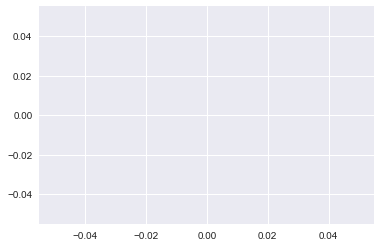

In [425]:
sns.distplot(titanic['Age'])

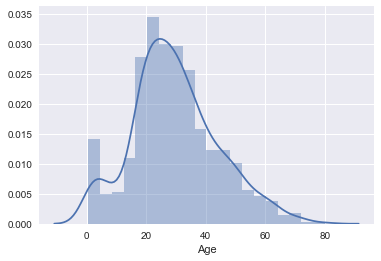

In [431]:
sns.distplot(titanic['Age'].dropna())

##### kde - oszacowanie gęstości rozkładu, możemy sobie wyłączyć!

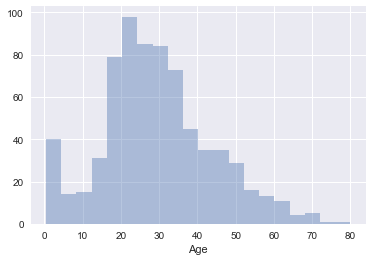

In [432]:
sns.distplot(titanic['Age'].dropna(), kde = False)

###### Linia rozkładu normalnego - uwaga, potrzebujemy do tego funkcji gamma z pakietu scipy.stats (w pierwszej komórce notatnika wpisaliśmy komendę from scipy import stats)

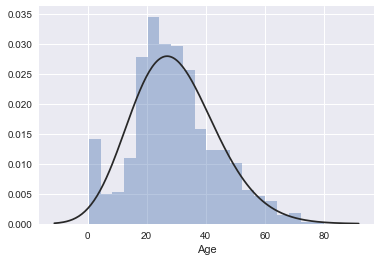

In [433]:
sns.distplot(titanic['Age'].dropna(), kde = False, fit = stats.gamma)

###### Jeśli chcemy wyłączyć słupki, korzystamy z argumentu hist.

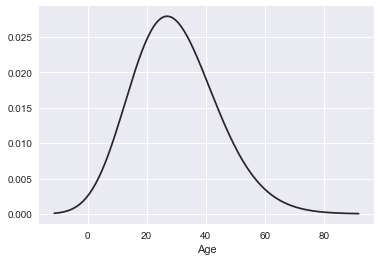

In [435]:
sns.distplot(titanic['Age'].dropna(), hist=False, kde=False, fit = stats.gamma)

##### Możemy również nałożyć na siebie parę histogramów:

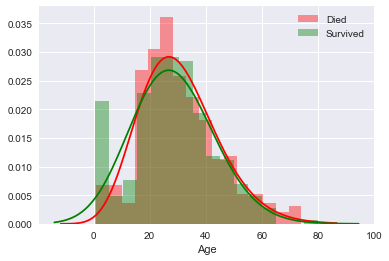

In [437]:
sns.distplot(titanic['Age'][titanic['Survived'].isin([0])].dropna(), kde=False, fit = stats.gamma, label='Died',
            color='red',kde_kws = {'alpha': 0.3},fit_kws = {'color': 'red'})
sns.distplot(titanic['Age'][titanic['Survived'].isin([1])].dropna(), kde=False, fit = stats.gamma,label='Survived',
             color = 'green',
            fit_kws = {'color': 'green'})
plt.legend()

##### Stripplot - wykres rozrzutu, gdzie jedna zmienna jest kategorialna.
##### Większość wykresów w Seaborn ma podobną strukturę argumentów i nierzadko wystarczy zmienić jedynie nazwę funkcji bez dodawania jakichkolwiek dodatkowych argumentów.
###### data: argument w którym bodajemy nazwę danych, do których się odwołujemy (to może być tabela Pandas, może też być macierz danych NumPy oraz inne)
###### x = zmienna na osi x, y = zmienna na osi y. Nazwy wpisujemy w cudzysłów.

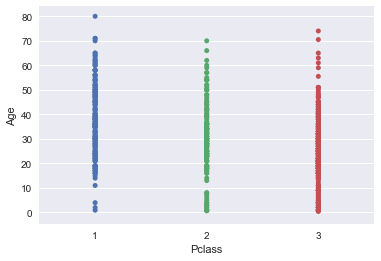

In [438]:
sns.stripplot(data=titanic, x="Pclass", y="Age")

##### Do takiego wykresu możemy łatwo dodać losowy szum, który przesunie nieco poszczególne obserwacje na osi x, żeby te na siebie aż tak bardzo nie nachodziły.

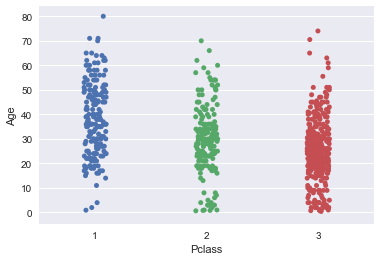

In [439]:
sns.stripplot(data=titanic, x="Pclass", y="Age", jitter=True)

##### Możemy też wykonać tzw. swarmplot, który stara się nie nakładać na siebie poszczególnych obserwacji

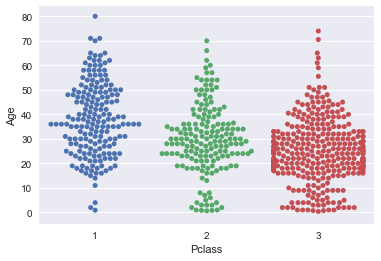

In [445]:
sns.swarmplot(data=titanic, x="Pclass", y="Age")

##### argument hue - podział obserwacji według innej zmiennej

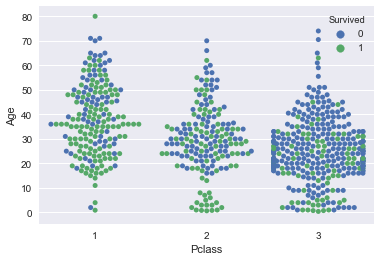

In [443]:
sns.swarmplot(data=titanic, x="Pclass", y="Age", hue = 'Survived')

###### Wykres skrzynkowy

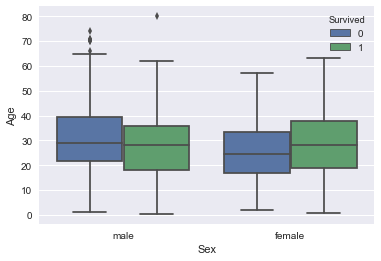

In [447]:
sns.boxplot(data=titanic, x="Sex", y="Age", hue="Survived")

##### Wykres skrzypcowy - pokazuje kształt rozkładu

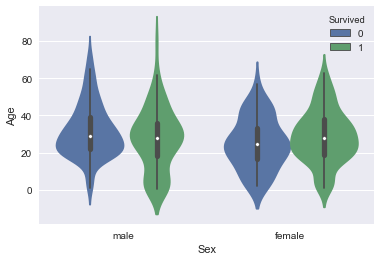

In [448]:
sns.violinplot(data=titanic, x="Sex", y="Age", hue="Survived");

##### Wykres skrzypcowy w nieco innym wydaniu

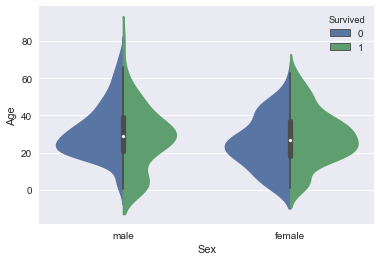

In [450]:
sns.violinplot(data=titanic, x="Sex", y="Age", hue="Survived", split = True);

###### Wykresy można łatwo na siebie nakładać!

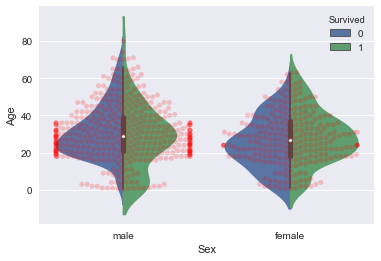

In [451]:
sns.violinplot(data=titanic, x="Sex", y="Age", hue="Survived", split = True);
sns.swarmplot(data=titanic, x="Sex", y="Age", color="red", alpha=.2);

###### Wykresy słupkowe - barplot służy do pokazywania statystyk opisowych (np. średnich)

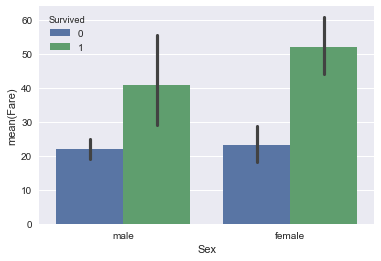

In [453]:
sns.barplot(data=titanic, x="Sex", y="Fare", hue="Survived");

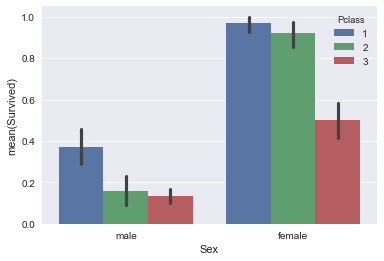

In [454]:
sns.barplot(data=titanic, x="Sex", y="Survived", hue="Pclass");

##### countplot - na osi y liczebności

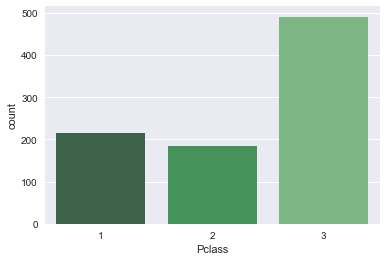

In [456]:
sns.countplot(data=titanic, x="Pclass", palette="Greens_d");

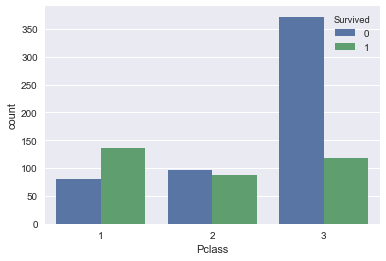

In [458]:
sns.countplot(data=titanic, x="Pclass", hue='Survived');

##### Factorplot - specjalny rodzaj wykresu, w którym definiujemy, z jakim rodzajem wykresu chcemy mieć do czynienia

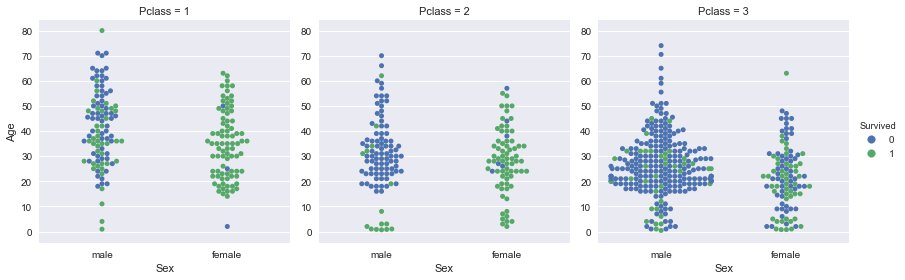

In [461]:
sns.factorplot(data=titanic, x="Sex", y="Age", hue='Survived',
               col="Pclass", kind="swarm");

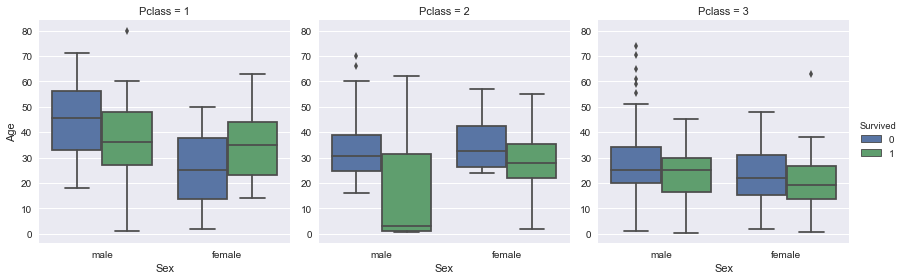

In [462]:
sns.factorplot(data=titanic, x="Sex", y="Age", hue='Survived',
               col="Pclass", kind="box")

##### Wykres rozrzutu - służy do pokazywania związków między dwoma zmiennymi

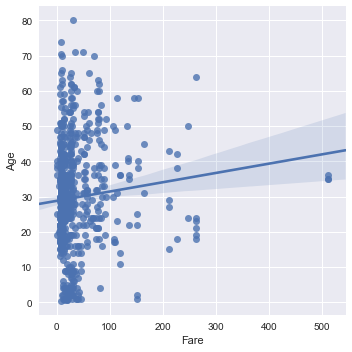

In [463]:
sns.lmplot(data=titanic, x="Fare", y="Age")

###### Wykres dla regresji logistycznej, czyli takiej regresji, gdzie zmienną przewidywaną jest zmienna dychotomiczna (0-1, przeżył/nie przeżył)

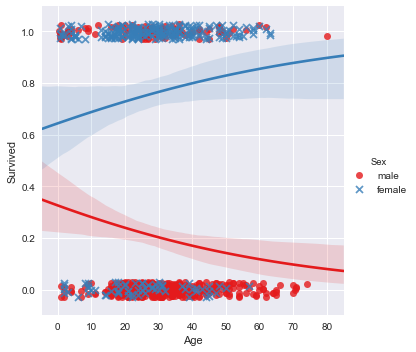

In [471]:
sns.lmplot(data=titanic, x="Age", y="Survived",
           logistic=True, y_jitter=.03, hue='Sex',markers=["o", "x"],  palette="Set1");

###### Wykresy rozrzutu (oraz linia regresji) w podziale według płci i klasy

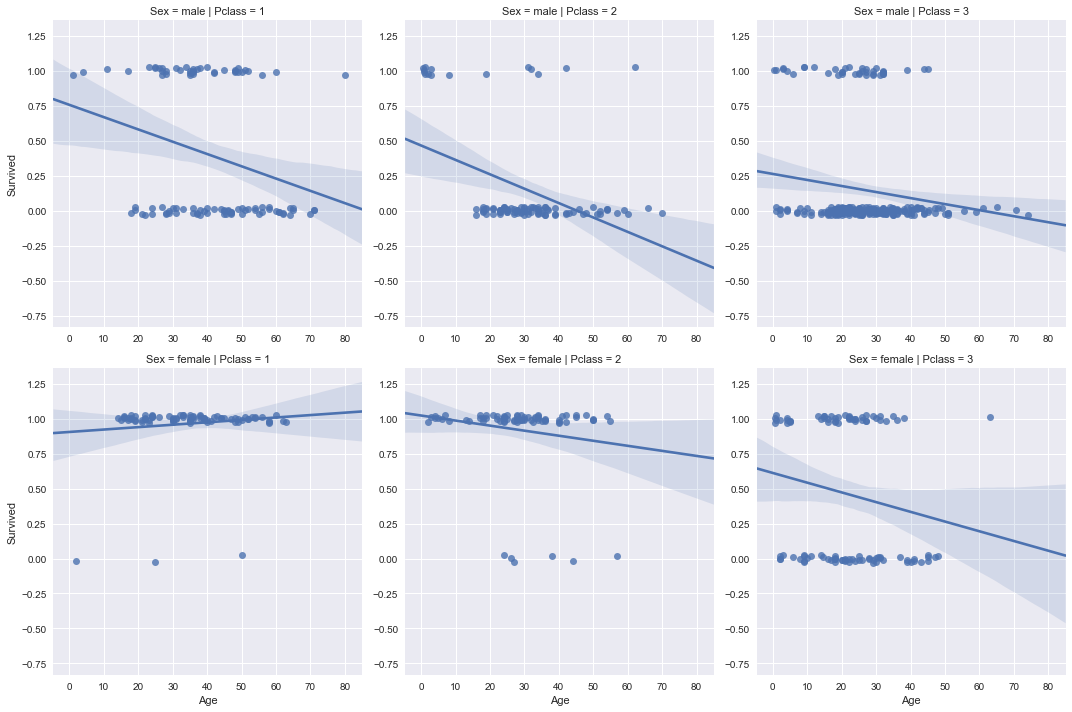

In [473]:
sns.lmplot(data=titanic, x="Age", y="Survived",
           logistic=False, y_jitter=.03, col='Pclass', row = 'Sex',  palette="Set1");

## Wyzwanie 2

Mili moi, czas na kolejne wyzwanie w ramach pracy Koła! Tym razem jedziemy na kurs kolizyjny z prawdziwymi danymi! Wybrałem ze strony Kaggle (witryna do nauki machine learningu, BARDZO BARDZO polecam) cztery zakresy tematyczne - każdy zespół (max. 4 osoby) lub każde indywiduum wybiera sobie dowolny temat. Opcje mamy następujące:

* Diamenty - [Link do informacji](https://www.kaggle.com/shivam2503/diamonds)
* Szczęście na świecie (2015-2017) - [Link do informacji](https://www.kaggle.com/unsdsn/world-happiness)
* Speed Dating - [Link do informacji](https://www.kaggle.com/annavictoria/speed-dating-experiment)
* Rankingi Uniwersyteckie - [Link do informacji](https://www.kaggle.com/mylesoneill/world-university-rankings)

Niektóre z tych tematów mają jeden plik, niektóre mają plików parę. Nie ograniczajcie się, możecie próbować łączyć dane ze sobą w dowolny sposób, byle tyle wykonać zadanie. No właśnie, a jakie właściwie jest zadanie?

Już wiecie w jaki sposób tworzyć tabele i ładne wykresy w Pythonie. Bardzo bym chciał, żeby każdy zespół/indywiduum przygotował przynajmniej 10 ładnych wykresów (opcja minimum to 5), które będą pokazywały ciekawe zależności, różnice. Macie całkowicie wolną rękę w tym temacie. Nie musicie używać żadnych statystyk czy testów, natomiast jeśli ktoś chce wyjść z dodatkową inicjatywą (na przykład w tym aspekcie), to niech się nie krępuje! Im więcej, tym lepiej!

Wszystkie bazy danych są dostępne [TUTAJ](https://github.com/kpswps/py/tree/master/datasets/challenge_2)

Wszelkie rozterki, pytania tudzież wątpliwości natury filozoficznej proszę wrzucać na Slacka!

Swoje rozważania będziemy prezentować __22.01__ (na przedostatnim spotkaniu) - każdy zespół/indywiduum jest proszony/e o przygotowanie ładnego notatnika, w którym zaprezentowane zostaną odpowiednie treści! W związku z tym pierwsza rada: proszę zapoznać się z Markdownem!!! Ten tekst został właśnie skompilowany przy użyciu Markdowna.
